In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>=0.93):
            print("\nReache 60% accuracy so canlling trainig!")
            self.model.stop_training = 1

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
callbacks = myCallback()

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28,28,1)
test_images = test_images / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.summary()
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [10]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 628us/sample - loss: 0.2702 - acc: 0.9068


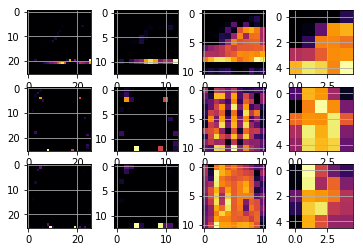

In [24]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0, x].grid(True)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, : , :,CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1, x].grid(True)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, : , :,CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2, x].grid(True)
    